<a href="https://colab.research.google.com/github/frcdouglas/regress-olinear_case_house_USA/blob/main/regress%C3%A3o_linear_casas_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
base_casa = pd.read_csv("USA_Housing.csv", sep=",")
base_casa.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
base_casa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
base_casa.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

In [ ]:
fig = px.box(base_casa, x = "Avg. Area Income")
fig.update_traces(line_color="blue")

In [ ]:
fig = px.box(base_casa, x = "Price")
fig.update_traces(line_color="blue")

In [ ]:
base_casa.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [ ]:
# Para tratar o nome das colunas, por convensão, retiramos os espaços dos nomes.

base_casa = base_casa.rename(columns={"Avg. Area Income":"Avg_Area_Income", "Avg. Area House Age":"Avg_Area_House_Age", "Avg. Area Number of Rooms":"Avg_Area_Number_of_Rooms","Avg. Area Number of Bedrooms":"Avg_Area_Number_of_Bedrooms","Area Population":"Area_Population"})
base_casa.head()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
# dentro da regressão linear, são necessarias apenas variaveis numéricas, por isso a coluna de endereço pode ser descartada.

base_casa.drop(["Address"], axis=1, inplace=True)
base_casa.head()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


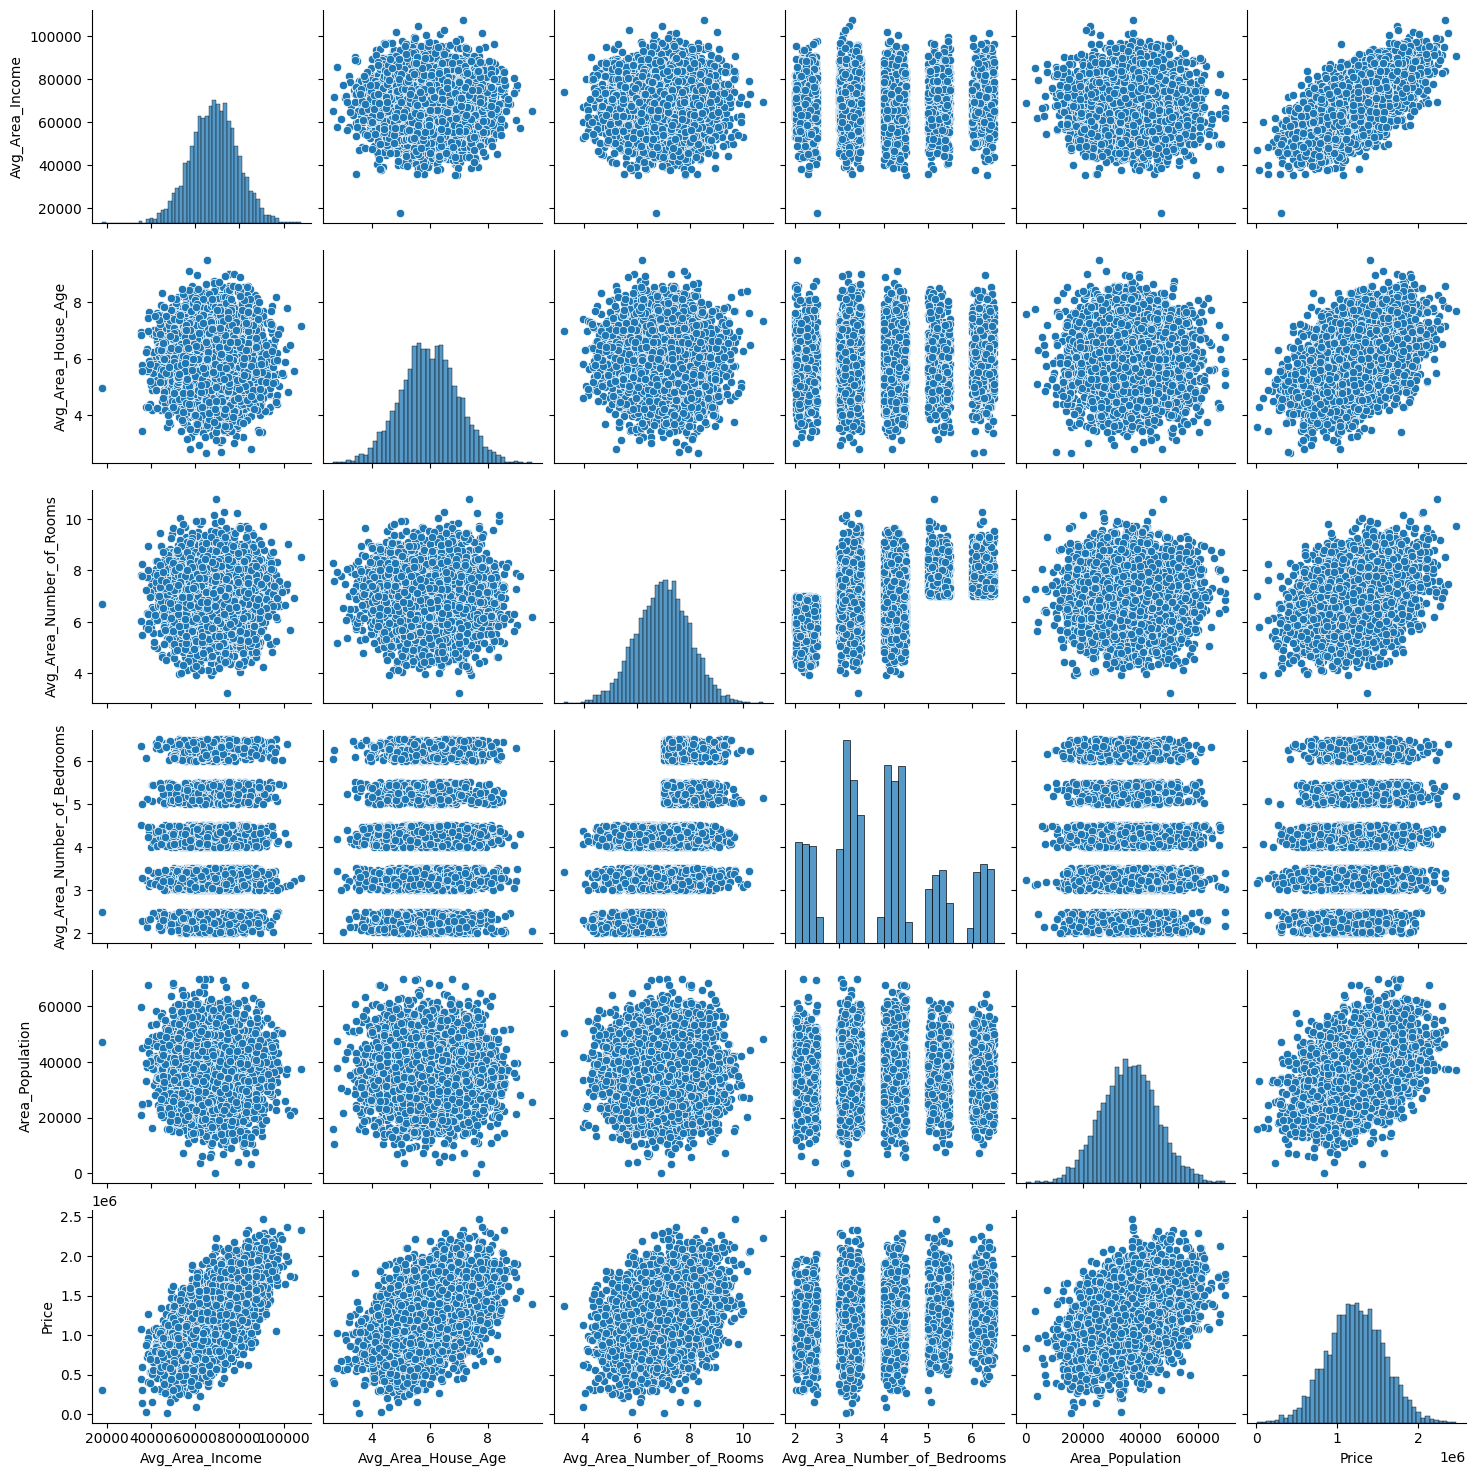

In [ ]:
# este grafico nos mostra a correlação entre os dados de todas as colunas

sns.pairplot(base_casa)

In [ ]:
base_casa.columns

Index(['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedrooms', 'Area_Population', 'Price'],
      dtype='object')

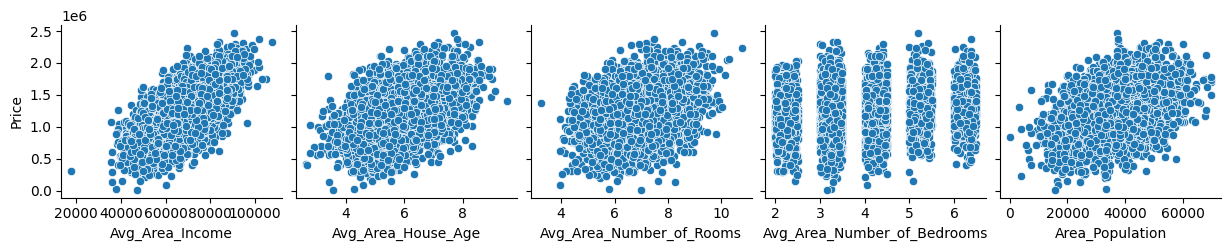

In [ ]:
# como vamos nos concentrar mais na variavel preço, vamos fazer a extrair apenas a correlação das colunas com o preço
sns.pairplot(base_casa, x_vars=['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedrooms', 'Area_Population'], y_vars= 'Price')

In [ ]:
# notamos uma variação linear entre o preço e as outras variaveis. Quanto maior é a veriavel, maior é o preço. Podemos confirmar isso com a correlação:

base_casa.corr()

#Quanto mais proximo de 1, maior a correlação

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price
Avg_Area_Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg_Area_House_Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg_Area_Number_of_Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg_Area_Number_of_Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area_Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<Axes: >

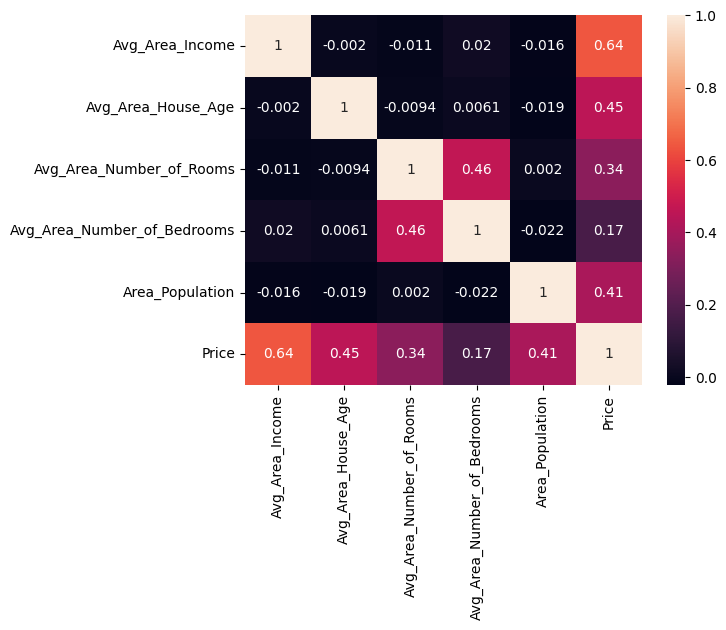

In [ ]:
sns.heatmap(base_casa.corr(), annot=True) # annot - traz o valor no gráfico de calor

<Axes: xlabel='Price', ylabel='Count'>

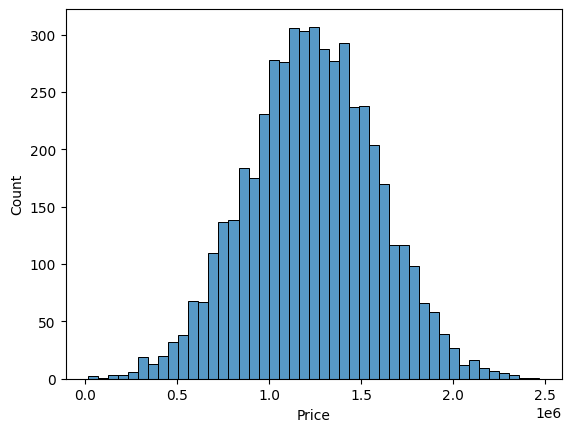

In [ ]:
sns.histplot(base_casa['Price'])

In [ ]:
base_casa.columns

Index(['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedrooms', 'Area_Population', 'Price'],
      dtype='object')

In [ ]:
# aqui vamos separar as variaveis em explicativas da variavel alvo. em nosso caso vamos tentar prever o preço

x = base_casa[['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedrooms', 'Area_Population']]

y = base_casa[['Price']]

In [ ]:
# vamos dividir a base em treino e teste

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7,  test_size = 0.3, random_state=42)


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)

(3500, 5)
(1500, 5)
(3500, 1)
(1500, 5)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(x_test)

In [ ]:
# r2_score é um parametro para visualizar se a regressão esta de acordo

from sklearn.metrics import r2_score

r = r2_score(y_test, y_pred)

print("r_quadrado: ", r)

r_quadrado:  0.914681849875402


In [ ]:
# LINEARIDADE BOA

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Preço do imovel')

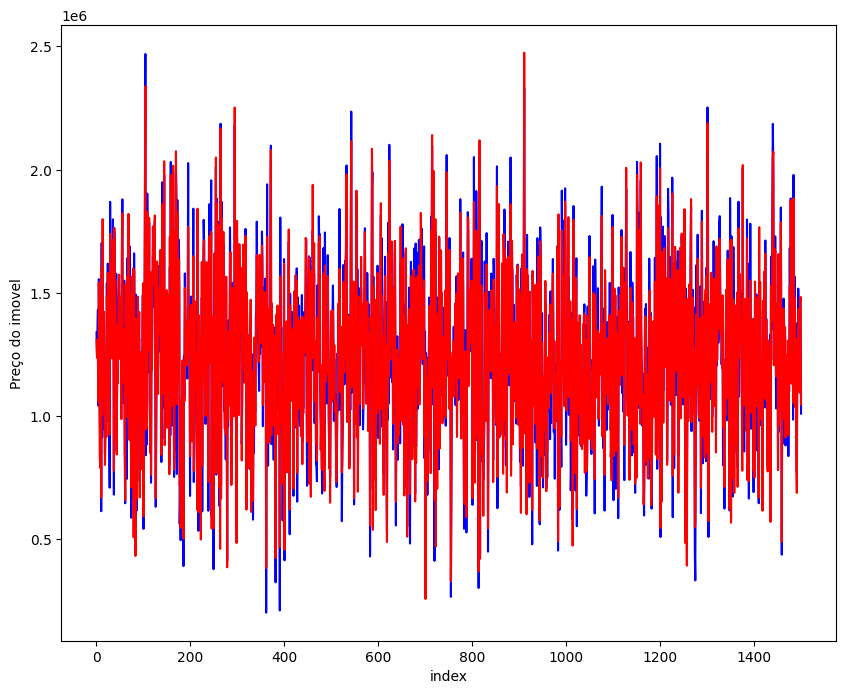

In [ ]:
c = [i for i in range(1,1501,1)]
fig = plt.figure(figsize=(10,8))
plt.plot(c, y_test, color="blue")
plt.plot(c, y_pred, color='red')
plt.xlabel("index")
plt.ylabel("Preço do imovel")

In [ ]:
# premissa para teste de predição

Avg_Area_Income = 50
Avg_Area_House_Age = 30
Avg_Area_Number_of_Rooms = 7
Avg_Area_Number_of_Bedrooms = 5
Area_Population = 200
entrada = [[Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population]]

lm.predict(entrada)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([3183762.92246664])